In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Loading the dataset

In [2]:
df = pd.DataFrame(pd.read_csv('C:/Users/Rahul/Downloads/movie_metadata.csv~1/movie_metadata.csv'))
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.shape

(5043, 28)

In [4]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [5]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
# Check which column contains null value
df.isnull().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [7]:
# % of null items in the column 
(df.isnull().sum()/df.shape[0])*100

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score               

Percentage of Nan value is very less, so we can replace the Nan with 0

In [8]:
df = df.fillna(value=df.mean())
df.shape

(5043, 28)

Now we'll find the correlation between the attributes and target variable (IMDB score) using heatmap

Now, if we apply heatmap to the whole dataset, it'll create heatmap of columns with dtype int or float (excluding object)

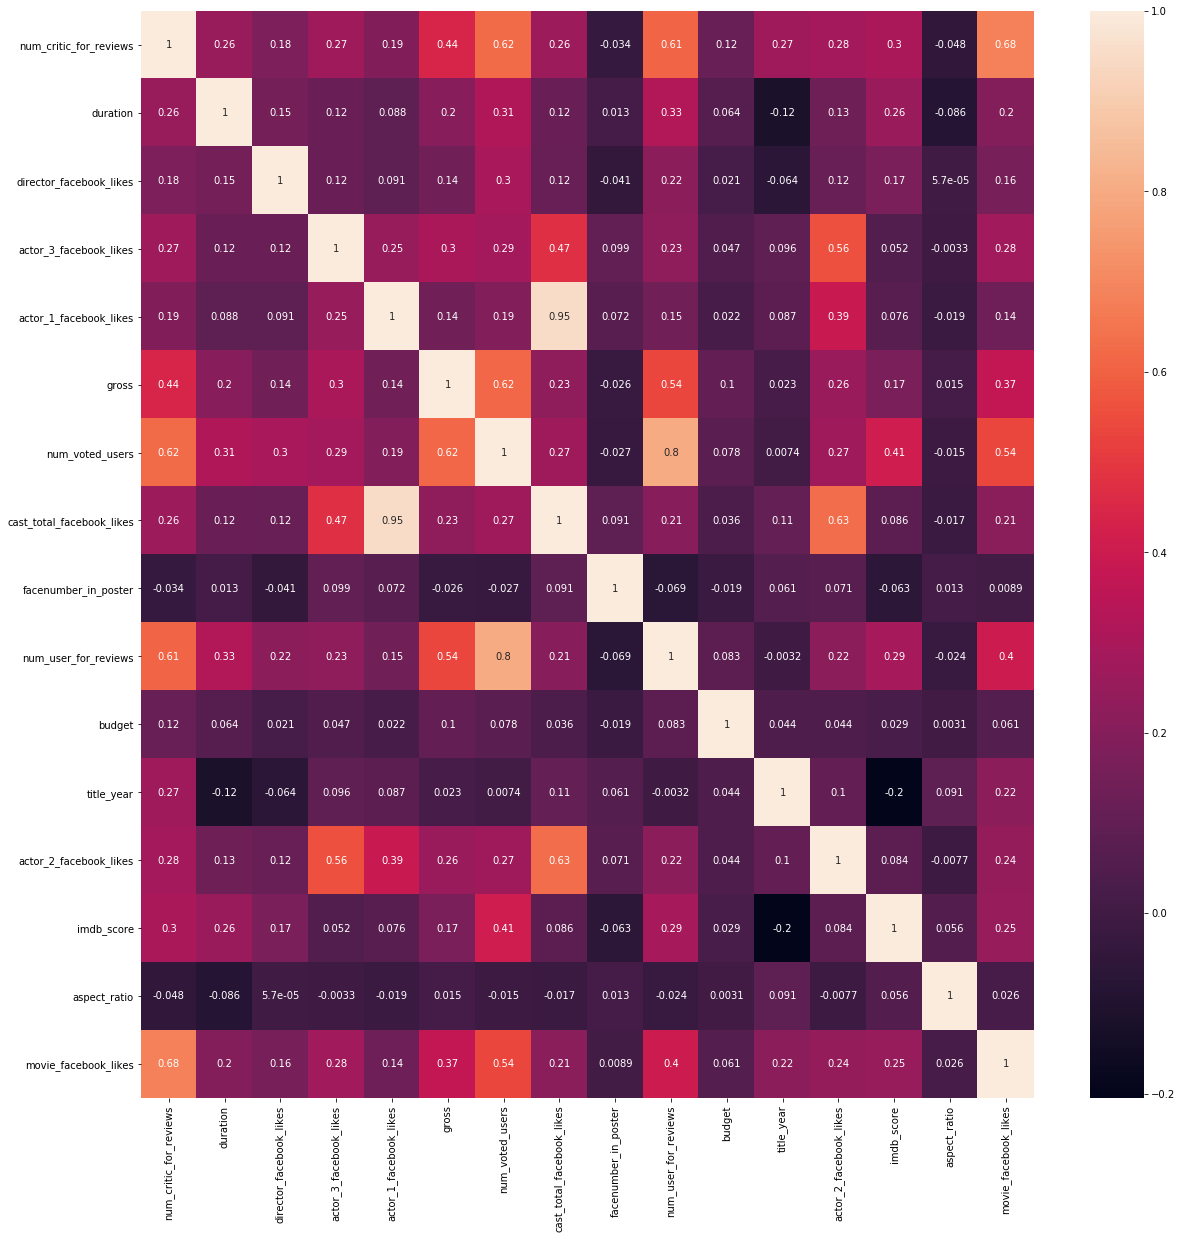

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

In [10]:
# Simple function to get the name of most correlated attributes
def get_correlated_col(cor_data, threshold):
    #cor_data to be column along which corelation to be measured
    #threshold be the value above which of correlation to be considered
    feature=[]
    value=[]
    
    for i, index in enumerate(cor_data.index):
        if abs(cor_data[index]) > threshold:
            feature.append(index)
            value.append(cor_data[index])
    
    df = pd.DataFrame(data=value, index = feature, columns= ['corr value'])
    return df
    


In [11]:
top_correlated_value = get_correlated_col(df.corr()['imdb_score'], 0.2)
top_correlated_value

,corr value
num_critic_for_reviews,0.302808
duration,0.260886
num_voted_users,0.410965
num_user_for_reviews,0.291472
title_year,-0.204981
imdb_score,1.000000
movie_facebook_likes,0.247049


In [12]:
final_df = df[top_correlated_value.index]
final_df

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes
0,723.000000,178.000000,886204,3054.000000,2009.000000,7.9,33000
1,302.000000,169.000000,471220,1238.000000,2007.000000,7.1,0
2,602.000000,148.000000,275868,994.000000,2015.000000,6.8,85000
3,813.000000,164.000000,1144337,2701.000000,2012.000000,8.5,164000
4,140.194272,107.201074,8,272.770808,2002.470517,7.1,0
...,...,...,...,...,...,...,...
5038,1.000000,87.000000,629,6.000000,2013.000000,7.7,84
5039,43.000000,43.000000,73839,359.000000,2002.470517,7.5,32000
5040,13.000000,76.000000,38,3.000000,2013.000000,6.3,16
5041,14.000000,100.000000,1255,9.000000,2012.000000,6.3,660


Now lets work with columns with dtype of object

In [13]:
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [14]:
#Changing categorical values(Object) into numerical value using Encoder
from sklearn.preprocessing import LabelEncoder 

cat_col = cat_df.columns
for i in cat_col:
    enc = LabelEncoder()
    cat_df[i] = enc.fit_transform(cat_df[i].astype('str'))

C:\Users\Rahul\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
cat_df.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,1,922,1405,106,264,396,3437,1318,2964,11,62,7
1,1,794,2216,100,976,2725,1390,4281,2720,11,62,7
2,1,2021,2487,127,349,3274,3129,2078,4532,11,61,7
3,1,373,532,287,1963,3705,1763,3482,3755,11,62,7
4,2,600,2431,753,522,3327,3518,4675,4917,47,65,18


In [16]:
# Adding target column in the cat_df to get the correlation
cat_df['imdb_score'] = df['imdb_score'] 

C:\Users\Rahul\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
cat_df.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,imdb_score
0,1,922,1405,106,264,396,3437,1318,2964,11,62,7,7.9
1,1,794,2216,100,976,2725,1390,4281,2720,11,62,7,7.1
2,1,2021,2487,127,349,3274,3129,2078,4532,11,61,7,6.8
3,1,373,532,287,1963,3705,1763,3482,3755,11,62,7,8.5
4,2,600,2431,753,522,3327,3518,4675,4917,47,65,18,7.1


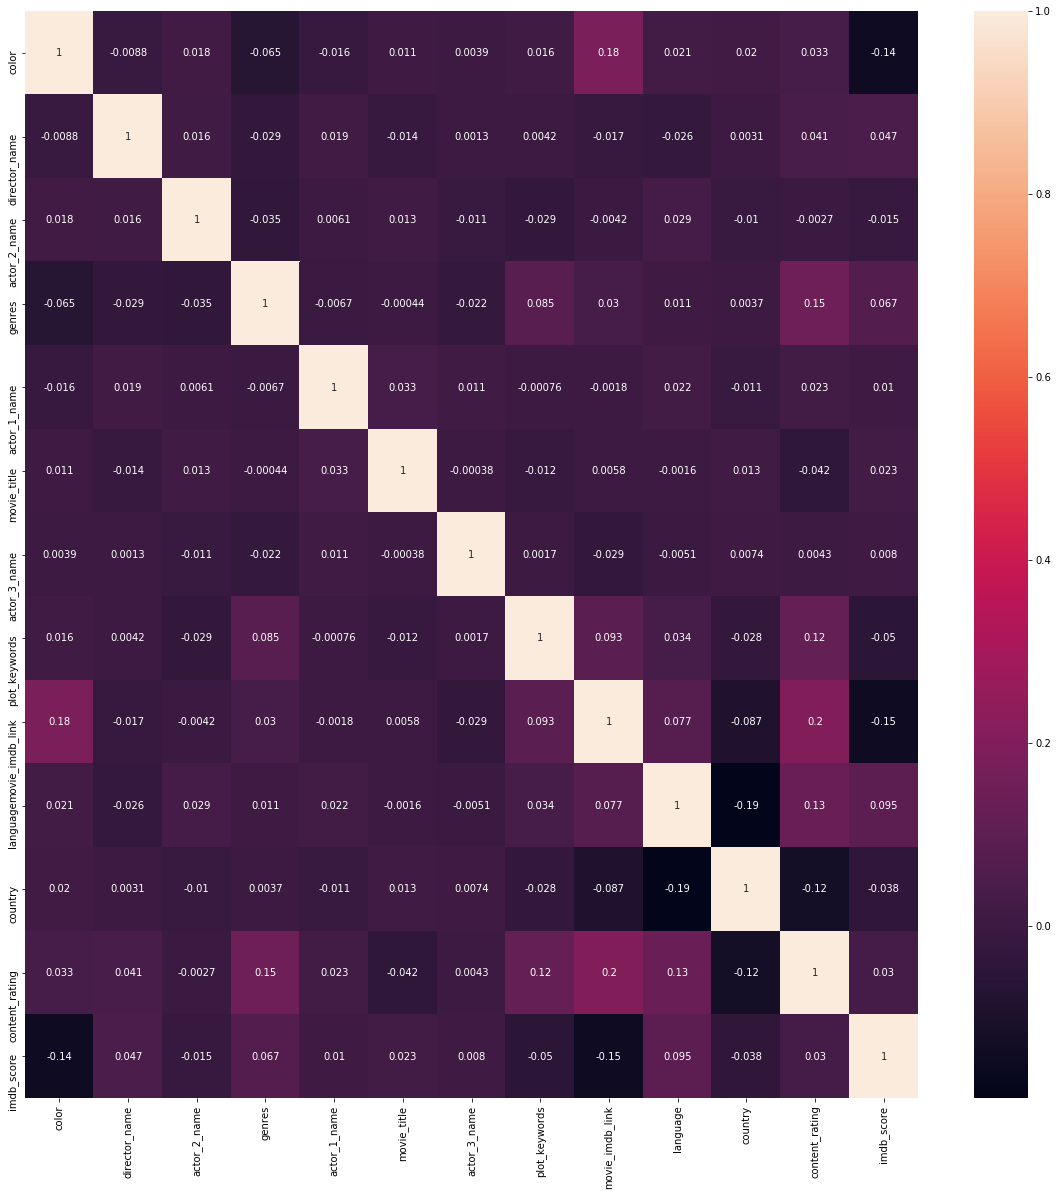

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cat_df.corr(), annot = True)

In [19]:
#Adding correlated attribute to final_df
final_df['color'] = cat_df['color']
final_df['director_name'] = cat_df['director_name']
final_df['genres'] = cat_df['genres']
final_df['language'] = cat_df['language']


C:\Users\Rahul\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahul\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rahul\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [20]:
final_df.head()

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes,color,director_name,genres,language
0,723.000000,178.000000,886204,3054.000000,2009.000000,7.9,33000,1,922,106,11
1,302.000000,169.000000,471220,1238.000000,2007.000000,7.1,0,1,794,100,11
2,602.000000,148.000000,275868,994.000000,2015.000000,6.8,85000,1,2021,127,11
3,813.000000,164.000000,1144337,2701.000000,2012.000000,8.5,164000,1,373,287,11
4,140.194272,107.201074,8,272.770808,2002.470517,7.1,0,2,600,753,47


In [21]:
#spliting attributes and target 
X = final_df.drop(['imdb_score'], axis=1)
y = final_df['imdb_score']

In [22]:
X.head()

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,movie_facebook_likes,color,director_name,genres,language
0,723.000000,178.000000,886204,3054.000000,2009.000000,33000,1,922,106,11
1,302.000000,169.000000,471220,1238.000000,2007.000000,0,1,794,100,11
2,602.000000,148.000000,275868,994.000000,2015.000000,85000,1,2021,127,11
3,813.000000,164.000000,1144337,2701.000000,2012.000000,164000,1,373,287,11
4,140.194272,107.201074,8,272.770808,2002.470517,0,2,600,753,47


In [23]:
X.shape

(5043, 10)

In [24]:
#Now we'll transform features by scaling each feature to a given range (0 to 1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,movie_facebook_likes,color,director_name,genres,language
0,0.889163,0.339286,0.524453,0.603479,0.930000,0.094556,0.5,0.384487,0.116101,0.234043
1,0.370690,0.321429,0.278865,0.244515,0.910000,0.000000,0.5,0.331109,0.109529,0.234043
2,0.740148,0.279762,0.163256,0.196284,0.990000,0.243553,0.5,0.842786,0.139102,0.234043
3,1.000000,0.311508,0.677216,0.533702,0.960000,0.469914,0.5,0.155546,0.314348,0.234043
4,0.171422,0.198812,0.000002,0.053720,0.864705,0.000000,1.0,0.250209,0.824754,1.000000


In [25]:
#Now lets split data in test train pairs in 0.7/0.3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [26]:
#Fitting the model
from sklearn.linear_model import LinearRegression

LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#Prediction
y_pred = LinearReg.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
4397,5.1,6.200255
4849,4.5,6.681059
2695,6.4,6.597938
4570,7.2,6.186849
1058,6.8,6.511462


In [28]:
#Evaluating the Model

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7391598873185263
Mean Squared Error: 0.9548448846883614
Root Mean Squared Error: 0.9771616471640511


The mean error in our prediction is less than 15% which is acceptable.